---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [11]:
np.random.binomial(20, 0.5,10000)
help(np.random.binomial)

Help on built-in function binomial:

binomial(...) method of mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    Parameters
    ----------
    n : float (but truncated to an integer)
            parameter, >= 0.
    p : float
            parameter, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    samples : ndarray or scalar
              where the values are all integers in  [0, n].
    
    See Also
    --------
    scipy.stats.distributions.binom 

In [12]:
np.random.binomial(1000, 0.5)/1000

0.518

In [13]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

In [15]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

117 tornadoes back to back in 2739.72602739726 years


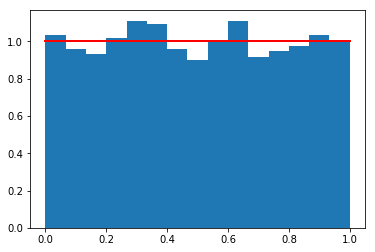

In [36]:
import matplotlib.pyplot as plt
s=np.random.uniform(0,1,1000)
count, bins, ignored = plt.hist(s, 15, normed=True)
np.random.uniform(0, 1)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()
#help(np.random.uniform)

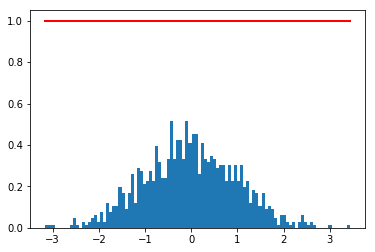

In [34]:
#np.random.normal(0.75)
#help(np.random.normal)
import matplotlib.pyplot as plt
s=np.random.normal(0,1,1000)
count, bins, ignored = plt.hist(s, 100, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()


Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [43]:
distribution = np.random.normal(0.75,size=1000)
len(distribution)
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))


1.0181898172537347

In [44]:
np.std(distribution)

1.0181898172537347

In [45]:
import scipy.stats as stats
help(stats.kurtosis)
stats.kurtosis(distribution)

Help on function kurtosis in module scipy.stats.stats:

kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate')
    Computes the kurtosis (Fisher or Pearson) of a dataset.
    
    Kurtosis is the fourth central moment divided by the square of the
    variance. If Fisher's definition is used, then 3.0 is subtracted from
    the result to give 0.0 for a normal distribution.
    
    If bias is False then the kurtosis is calculated using k statistics to
    eliminate bias coming from biased moment estimators
    
    Use `kurtosistest` to see if result is close enough to normal.
    
    Parameters
    ----------
    a : array
        data for which the kurtosis is calculated
    axis : int or None, optional
        Axis along which the kurtosis is calculated. Default is 0.
        If None, compute over the whole array `a`.
    fisher : bool, optional
        If True, Fisher's definition is used (normal ==> 0.0). If False,
        Pearson's definition is used (normal ==> 3.0)

0.2014934779631603

In [55]:
stats.skew(distribution)
help(np.random.chisquare)

Help on built-in function chisquare:

chisquare(...) method of mtrand.RandomState instance
    chisquare(df, size=None)
    
    Draw samples from a chi-square distribution.
    
    When `df` independent random variables, each with standard normal
    distributions (mean 0, variance 1), are squared and summed, the
    resulting distribution is chi-square (see Notes).  This distribution
    is often used in hypothesis testing.
    
    Parameters
    ----------
    df : int
         Number of degrees of freedom.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    output : ndarray
        Samples drawn from the distribution, packed in a `size`-shaped
        array.
    
    Raises
    ------
    ValueError
        When `df` <= 0 or when an inappropriate `size` (e.g. ``size=-1``)
       

In [52]:
chi_squared_df2 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df2)

1.3363316457778434

In [50]:
chi_squared_df5 = np.random.chisquare(8, size=10000)
stats.skew(chi_squared_df5)

0.9714867897026761

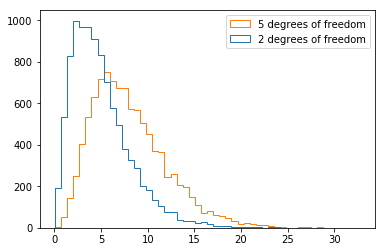

In [53]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [56]:
df = pd.read_csv('grades.csv')

In [57]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [58]:
len(df)

2315

In [59]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [60]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [61]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [62]:
from scipy import stats
stats.ttest_ind?

In [63]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [64]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [65]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)